In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin= dataset_url, cache_dir= ".", untar=True)

228813984/228813984 [==============================] - 6s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4093390305_4010c736c9.jpg'),
 PosixPath('datasets/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5148639829_781eb7d346.jpg'),
 PosixPath('datasets/flower_photos/roses/5249439791_196b4e7fc7.jpg'),
 PosixPath('datasets/flower_photos/roses/756943228_e15a7b2318.jpg')]

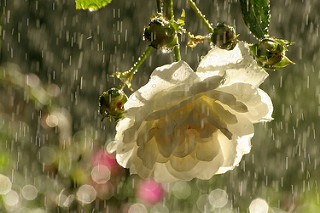

In [7]:
PIL.Image.open(str(roses[1]))

In [8]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [9]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [10]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4093390305_4010c736c9.jpg'

In [11]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(325, 500, 3)

In [12]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [13]:
x, y = [], []
for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

roses
daisy
dandelion
sunflowers
tulips


In [14]:
y[:5]

[0, 0, 0, 0, 0]

In [15]:
x = np.array(x)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [17]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [18]:
num_classes = 5

model = Sequential(
    [
        layers.Conv2D(16,3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(16,3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(16,3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
     
        layers.Flatten(),
        layers.Dense(128,activation = "relu"),
        layers.Dense(5 )
    ]
)

In [19]:
model.compile(optimizer = "adam",
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #accuracy increased when logits true added
            metrics = ["accuracy"])

model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 13s 18ms/step - loss: 1.3133 - accuracy: 0.4382
Epoch 2/5
86/86 [==============================] - 1s 15ms/step - loss: 1.0077 - accuracy: 0.6170
Epoch 3/5
86/86 [==============================] - 1s 16ms/step - loss: 0.8866 - accuracy: 0.6584
Epoch 4/5
86/86 [==============================] - 1s 16ms/step - loss: 0.7227 - accuracy: 0.7297
Epoch 5/5
86/86 [==============================] - 1s 16ms/step - loss: 0.6011 - accuracy: 0.7733


In [20]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 1s 21ms/step - loss: 0.9959 - accuracy: 0.6427


[0.9958813786506653, 0.6427015066146851]

In [21]:
predictions = model.predict(x_test_scaled)
predictions

29/29 [==============================] - 0s 11ms/step


array([[ 0.18338303, -0.8079663 ,  1.2741922 , -1.9932215 , -0.46402764],
       [ 1.719573  , -2.230222  , -0.2618337 , -2.7273917 ,  0.7292716 ],
       [-2.0091636 , -4.437345  ,  0.46840408,  1.1582997 , -2.924778  ],
       ...,
       [-0.836349  , -4.3517404 , -2.7063522 ,  3.3208146 , -0.46657225],
       [-0.24021189, -0.09808774,  0.90676   , -1.3479154 , -0.13165165],
       [-1.5108936 , -3.4736102 , -4.316138  ,  4.9683924 ,  0.38794425]],
      dtype=float32)

In [22]:
score = tf.nn.softmax(predictions[0])
score
np.argmax(score)

2

In [23]:
y_test[0]

1

In [27]:
data_augmentation = keras.Sequential([
    #layers.experimental not works?
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape =(180,180,3)
                                                 ),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),       
])

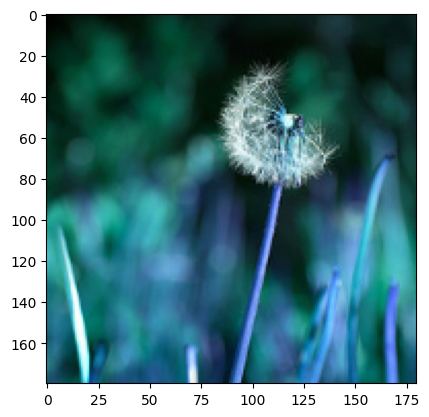

In [28]:
# data_augmentation(x/255)[0]
plt.imshow(x_train_scaled[0])

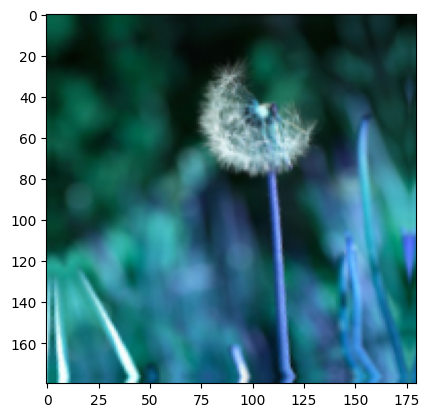

In [29]:
plt.imshow(data_augmentation(x_train_scaled)[0])

In [30]:
model = Sequential(
    [
        data_augmentation,
        layers.Conv2D(16,3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(16,3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(16,3, padding = "same", activation = "relu"),
        layers.MaxPooling2D(),
     
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128,activation = "relu"),
        layers.Dense(5 )
    ]
)

In [31]:
model.compile(optimizer = "adam",
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #accuracy increased when logits true added
            metrics = ["accuracy"])

model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 5s 23ms/step - loss: 1.3030 - accuracy: 0.4422
Epoch 2/5
86/86 [==============================] - 2s 22ms/step - loss: 1.0464 - accuracy: 0.5832
Epoch 3/5
86/86 [==============================] - 2s 22ms/step - loss: 0.9677 - accuracy: 0.6225
Epoch 4/5
86/86 [==============================] - 2s 22ms/step - loss: 0.8991 - accuracy: 0.6526
Epoch 5/5
86/86 [==============================] - 2s 22ms/step - loss: 0.8634 - accuracy: 0.6610


In [32]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 0s 11ms/step - loss: 0.9230 - accuracy: 0.6569


[0.923002302646637, 0.656862735748291]

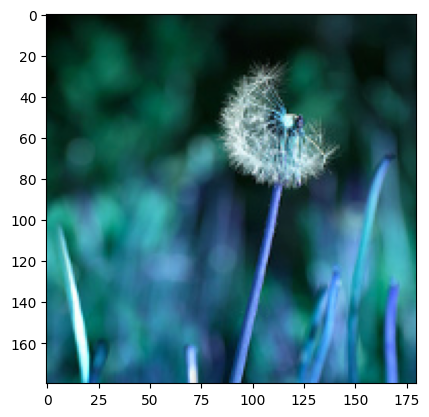

In [33]:
plt.imshow(x_train[0])